<a href="https://colab.research.google.com/github/muskan155/TestL3/blob/master/Malaria_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# About Dataset
Content

The dataset contains 2 folders

    Infected
    Uninfected
And a total of 27,558 images.

Acknowledgements
---
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.
Photo by Егор Камелев on Unsplash
https://unsplash.com/@ekamelev
Inspiration

Save humans by detecting and deploying Image Cells that contain Malaria or not!

Download from here: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria



In [ ]:
!pip install -U --no-cache-dir gdown --pre
#to download data
import gdown
dataset_url = "https://drive.google.com/u/1/uc?id=1FZDpYN2DuOv6O7_0bL4DPH9RxIEdQ3uk&export=download"
filename = "malaria.zip"
gdown.download(dataset_url, filename)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From (uriginal): https://drive.google.com/u/1/uc?id=1FZDpYN2DuOv6O7_0bL4DPH9RxIEdQ3uk&export=download
From (redirected): https://drive.google.com/uc?id=1FZDpYN2DuOv6O7_0bL4DPH9RxIEdQ3uk&export=download&confirm=t&uuid=bd0655ed-47c2-4c9c-9b05-c00cb52a2425
To: /content/malaria.zip
100%|██████████| 708M/708M [00:10<00:00, 65.5MB/s]


'malaria.zip'

In [ ]:
!unzip -oq /content/malaria.zip


In [ ]:
!rm -r /content/cell_images/cell_images

In [ ]:
import os
os.listdir('/content/cell_images/Parasitized')[:5]

['C118P79ThinF_IMG_20151002_105018_cell_140.png',
 'C168P129ThinF_IMG_20151118_154126_cell_157.png',
 'C137P98ThinF_IMG_20151005_161659_cell_4.png',
 'C80P41ThinF_IMG_20150817_110348_cell_126.png',
 'C133P94ThinF_IMG_20151004_154919_cell_119.png']

In [ ]:
import glob
glob.glob('/content/cell_images/Parasitized/*.png')

['/content/cell_images/Parasitized/C118P79ThinF_IMG_20151002_105018_cell_140.png',
 '/content/cell_images/Parasitized/C168P129ThinF_IMG_20151118_154126_cell_157.png',
 '/content/cell_images/Parasitized/C137P98ThinF_IMG_20151005_161659_cell_4.png',
 '/content/cell_images/Parasitized/C80P41ThinF_IMG_20150817_110348_cell_126.png',
 '/content/cell_images/Parasitized/C133P94ThinF_IMG_20151004_154919_cell_119.png',
 '/content/cell_images/Parasitized/C78P39ThinF_IMG_20150606_104106_cell_169.png',
 '/content/cell_images/Parasitized/C62P23N_ThinF_IMG_20150818_133055_cell_183.png',
 '/content/cell_images/Parasitized/C80P41ThinF_IMG_20150817_110834_cell_139.png',
 '/content/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_110115_cell_131.png',
 '/content/cell_images/Parasitized/C140P101ThinF_IMG_20151005_211735_cell_152.png',
 '/content/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_114804_cell_24.png',
 '/content/cell_images/Parasitized/C129P90ThinF_IMG_20151004_134306_cell_146

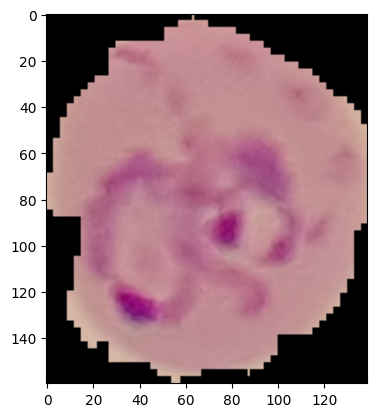

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('/content/cell_images/Parasitized/C82P43ThinF_IMG_20150817_124418_cell_166.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)


In [ ]:
import tensorflow as tf


In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory('/content/cell_images',
                                                           image_size = (120,120),
                                                           batch_size = 32,
                                                           seed = 123,
                                                           validation_split = 0.2,
                                                           subset = 'training')

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [ ]:
validation_images = tf.keras.utils.image_dataset_from_directory('/content/cell_images',
                                                           image_size = (120,120),
                                                           batch_size = 8,
                                                           seed = 123,
                                                           validation_split = 0.2,
                                                           subset = 'validation')

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1/255))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (120,120,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(train_images,
                    validation_data = validation_images,
                    epochs = 10)

Epoch 1/10
689/689 [==============================] - 39s 39ms/step - loss: 0.4849 - accuracy: 0.7556 - val_loss: 0.2786 - val_accuracy: 0.8926
Epoch 2/10
689/689 [==============================] - 27s 39ms/step - loss: 0.2315 - accuracy: 0.9224 - val_loss: 0.1938 - val_accuracy: 0.9352
Epoch 3/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1823 - accuracy: 0.9369 - val_loss: 0.1977 - val_accuracy: 0.9398
Epoch 4/10
689/689 [==============================] - 26s 37ms/step - loss: 0.1608 - accuracy: 0.9459 - val_loss: 0.2041 - val_accuracy: 0.9363
Epoch 5/10
689/689 [==============================] - 31s 44ms/step - loss: 0.1319 - accuracy: 0.9529 - val_loss: 0.2199 - val_accuracy: 0.9325
Epoch 6/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1154 - accuracy: 0.9590 - val_loss: 0.2558 - val_accuracy: 0.9261
Epoch 7/10
689/689 [==============================] - 26s 37ms/step - loss: 0.0810 - accuracy: 0.9717 - val_loss: 0.2588 - val_accuracy:

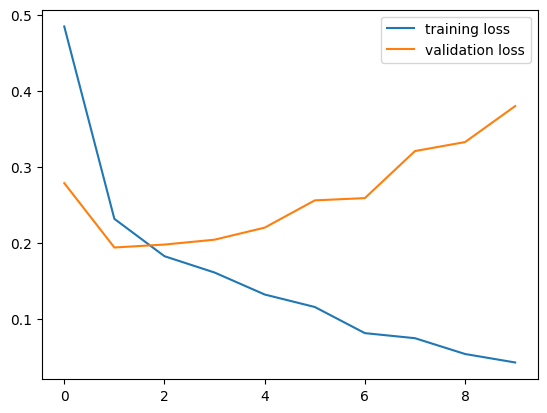

In [ ]:
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

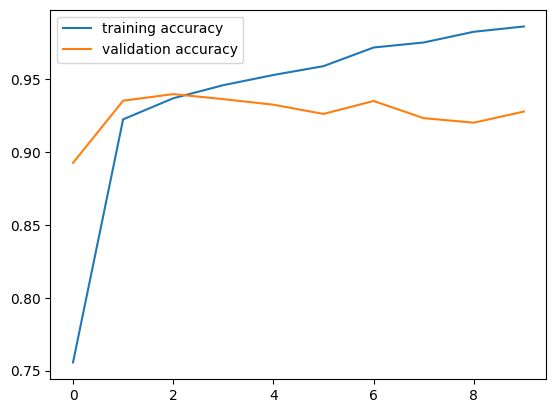

In [ ]:
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

# Image Data Augumentation

In [ ]:
augument = tf.keras.models.Sequential()
augument.add(tf.keras.layers.RandomFlip())
augument.add(tf.keras.layers.RandomRotation(factor = 0.4))


In [ ]:
train_images_augumented = train_images.map(lambda x, y: (augument(x), y))


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1/255))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (120,120,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(train_images_augumented,
                    validation_data = validation_images,
                    epochs = 10)

Epoch 1/10
689/689 [==============================] - 63s 88ms/step - loss: 0.5728 - accuracy: 0.6886 - val_loss: 0.2925 - val_accuracy: 0.8995
Epoch 2/10
689/689 [==============================] - 59s 85ms/step - loss: 0.2352 - accuracy: 0.9169 - val_loss: 0.1934 - val_accuracy: 0.9325
Epoch 3/10
689/689 [==============================] - 64s 93ms/step - loss: 0.1999 - accuracy: 0.9310 - val_loss: 0.1767 - val_accuracy: 0.9387
Epoch 4/10
689/689 [==============================] - 64s 92ms/step - loss: 0.1984 - accuracy: 0.9300 - val_loss: 0.1778 - val_accuracy: 0.9336
Epoch 5/10
689/689 [==============================] - 63s 92ms/step - loss: 0.1858 - accuracy: 0.9361 - val_loss: 0.1682 - val_accuracy: 0.9436
Epoch 6/10
689/689 [==============================] - 58s 84ms/step - loss: 0.1836 - accuracy: 0.9402 - val_loss: 0.1789 - val_accuracy: 0.9434
Epoch 7/10
689/689 [==============================] - 57s 83ms/step - loss: 0.1785 - accuracy: 0.9410 - val_loss: 0.1609 - val_accuracy: